In [311]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [312]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [313]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [315]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [316]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [317]:
mode1=df["job"].mode().values[0]
df["job"]=df["job"].replace("unknown",mode1)

In [318]:
mode2=df["marital"].mode().values[0]
df["marital"]=df["marital"].replace("unknown",mode2)

In [319]:
mode3=df["education"].mode().values[0]
df["education"]=df["education"].replace("unknown",mode3)

In [320]:
mode4=df["default"].mode().values[0]
df["default"]=df["default"].replace("unknown",mode4)

In [321]:
mode5=df["housing"].mode().values[0]
df["housing"]=df["housing"].replace("unknown",mode5)

In [322]:
mode6=df["loan"].mode().values[0]
df["loan"]=df["loan"].replace("unknown",mode6)

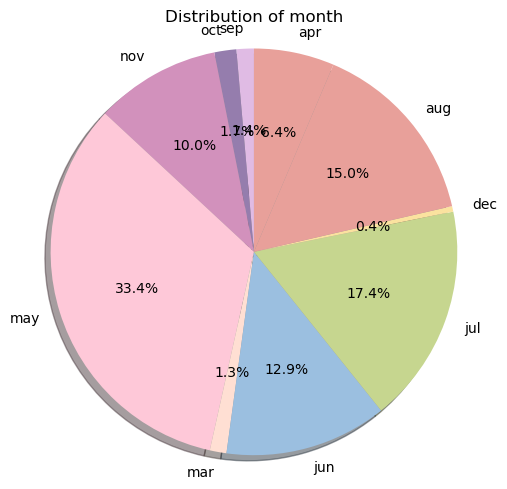

In [323]:
labels = df['month'].unique()
sizes = (df['month'].value_counts()/df['month'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(5,5))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3','#9BBFE0','#C6D68F','#FBE29F','#E8A09A','#E8A09A']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("Distribution of month")
plt.tight_layout()
plt.show()

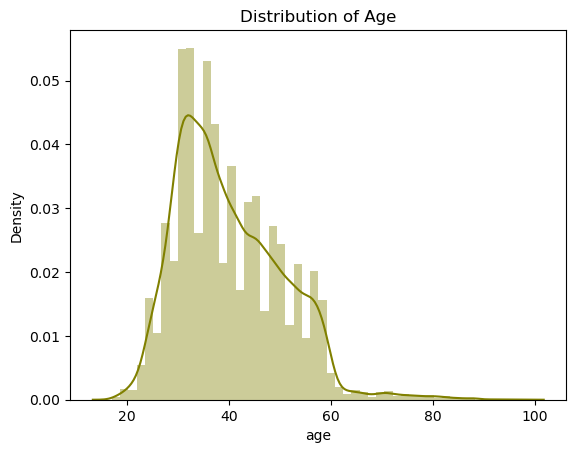

In [324]:
sns.distplot(df["age"],color="olive")
plt.title("Distribution of Age")
plt.show()

(array([3.6119e+04, 4.0590e+03, 7.8800e+02, 1.5500e+02, 4.0000e+01,
        1.2000e+01, 9.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

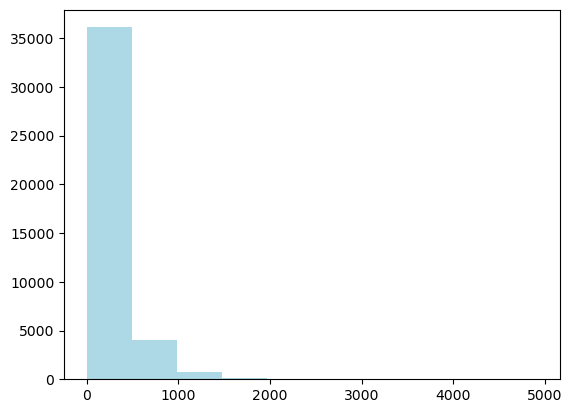

In [325]:
plt.hist(df["duration"],color="lightblue")

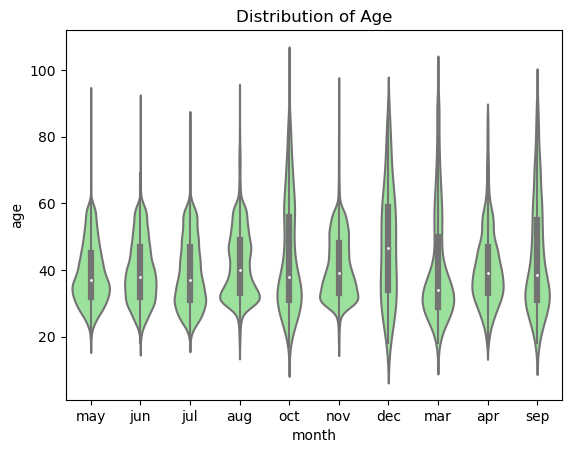

In [326]:
sns.violinplot(x="month",y="age",color="lightgreen",data=df)
plt.title("Distribution of Age")
plt.show()

<Axes: xlabel='age', ylabel='marital'>

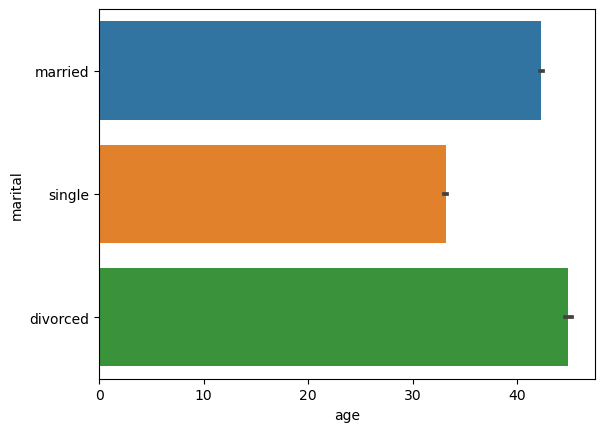

In [327]:
sns.barplot(x='age', y='marital',data=df)

In [328]:
df=pd.get_dummies(df,columns=["job","marital","education","poutcome","default","housing","loan","contact","month","day_of_week"])

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [330]:
df.shape

(41188, 58)

In [331]:
df["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [332]:
x=df.drop(["y"],axis=1)
y=df["y"]

In [333]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [334]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [335]:
model_1.score(x_train,y_train)

0.9074954042523672

In [336]:
model_1.score(x_test,y_test)

0.9109816298454317

In [337]:
model_1=KNeighborsClassifier()
model_1.fit(x_train,y_train)

KNeighborsClassifier()

In [338]:
model_1.score(x_train,y_train)

0.9302140057576914

In [339]:
model_1.score(x_test,y_test)

0.9075018208302986